In [5]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt


/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [6]:
%matplotlib inline

In [7]:
sport_dict = {
        101: "athlétisme",
        102: "sociétés d'aviron",
        103: "badminton",
        105: "basketball",
        106: "boxe ",
        107: "canoë-kayak",
        108: "cyclisme",
        109: "équitation",
        110: "escrime",
        111: "football",
        112: " sports de glace",
        113: "gymnastique ",
        114: "haltérophilie, musculation, force athlétique et culturisme",
        115: "handball",
        116: "hockey",
        117: "judo-jujitsu et disciplines associées",
        118: "lutte",
        119: "natation",
        120: "pentathlon moderne ",
        121: "ski",
        122: "taekwondo et disciplines associées" ,
        123: "tennis",
        124: "tennis de table",
        125: "tir",
        126: "tir à l'arc",
        127: "triathlon",
        128: "voile",
        129: "volley-ball",
        131: "hockey sur glace",
        132: "golf",
        133: "rugby",
        201: "aéromodélisme",
        202: "aéronautique",
        203: "aérostation",
        204: "aïkido, d'aïkibudo et affinitaires",
        205: "aïkido et de budo",
        206: "automobile",
        207: "jeu de balle au tambourin",
        208: "ballon au poing",
        209: "ball-trap et de tir à balle",
        210: "billard",
        211: "boules",
        212: "boxe française, savate et disciplines associées",
        213: "bowling et de sports de quilles",
        214: "char à voile",
        215: "la course camarguaise",
        216: "la course landaise",
        217: "la course d'orientation",
        218: "cyclotourisme",
        219: "danse",
        220: "échecs",
        221: "études et sports sous-marins",
        222: "football américain",
        223: "fighting full contact et disciplines associées",
        224: "giraviation",
        226: "javelot tir sur cible",
        227: "jeu de paume",
        228: "joutes et sauvetage nautique",
        229: "karaté et disciplines associées",
        231: "longue paume",
        232: "la montagne et de l'escalade",
        233: "motocyclisme",
        234: "motonautique",
        235: "muaythaï et disciplines associées",
        237: "parachutisme",
        238: "pêche sportive au coup",
        239: "pêcheurs en mer",
        240: "pêche à la mouche et au lancer",
        241: "pelote basque",
        242: "pétanque et jeu provençal",
        243: "planeur ultra léger motorisé" ,
        244: "pulka et traineau à chiens",
        245: "la randonnée pédestre",
        246: "roller sports",
        248: "rugby à XIII",
        249: "sauvetage et secourisme",
        250: "ski nautique et wake board",
        251: "spéléologie",
        252: "squash",
        253: "surf",
        254: "Wushu Arts énergétiques et martiaux chinois",
        255: "sports de traîneau, de ski pulka et cross canins",
        256: "twirling bâton",
        257: "vol à voile",
        258: "vol libre",
        260: "polo",
        261: "sports de contact et disciplines associées",
        262: "baseball et softball",
        263: "double dutch",
        264: "Fédération Flying Disc France: ",
        401: "clubs alpins et de montagne",
        402: "éducation physique et de gymnastique volontaire",
        403: "sport pour tous",
        404: "la retraite sportive",
        405: "travailliste",
        406: "clubs de la défense",
        407: "nationale en milieu rural",
        408: "sportive et culturelle de France",
        409: "Maccabi ",
        410: "sportive et gymnique du travail (FSGT)",
        411: "sportive de la police nationale",
        413: "Union française des œuvres laïques d'éducation p,hysique (UFOLEP)",
        415: "omnisports des personnels de l'éducation nationa,le de la jeunesse et sports (2 OPEN-JS)",
        417: "Union nationale sportive Léo Lagrange",
        418: "d'entreprise" ,
        420: "Fédération sportive des ASPTT",
        501: "handisport",
        503: "adapté",
        601: "universitaire",
        602: "Union générale sportive de l'enseignement libre",
        603: "Union nationale des clubs universitaires",
        604: "Union nationale scolaire (UNSS)",
        605: "Union sportive de l'enseignement du premier degré"
        }

In [8]:
def apply_sport(row):
    """ ajout des libellés de chaque FF"""
    try:
        return sport_dict[row]
    except KeyError:
        return row

def split_pop(s):
    return list(filter(None, s.split("pop")[1].split("_")))

def split_l(s):
    return list(filter(None, s.replace('2012', '2010').split("l")[1].split("_")))

In [9]:

def import_clean_licences_2012(path):
    # import
    t_licences = pd.read_csv(path, sep=";", quotechar="'", low_memory=False)
    t_licences.rename(columns={"l_30_44__2012": "l_30_44_2012"}, inplace=True)
    # get libellés des FF
    t_licences["fed_2012_libelles"] = t_licences['fed_2012'].apply(apply_sport)
    t_licences['poph_75_99_2010'] = [x.replace('"', '') for x in t_licences["poph_75_99_2010\""]]
    # fix invalid string
    t_licences["\"cog2"] = [x.replace('"', '') for x in t_licences["\"cog2"]]
    del t_licences['poph_75_99_2010\"']
    del t_licences["\"cog2"]
    # dtypes for pop indicators
    starts_with_pop = [x for x in t_licences.columns if x.startswith('pop')]
    t_licences.loc[:, t_licences.columns.isin(starts_with_pop)] =\
        t_licences.loc[:, t_licences.columns.isin(starts_with_pop)].convert_objects(convert_numeric=True)
    # calculate ratio
    l_labels = [x for x in t_licences.columns if x.startswith('l_')][:-3]
    pop_labels = [x for x in t_licences.columns if x.startswith('pop')]
    for l_lab in l_labels:
        for pop_lab in pop_labels:
            if (Counter(split_pop(pop_lab)) == Counter(split_l(l_lab))):
                t_licences[l_lab + "_ratio"] = t_licences[l_lab] / t_licences[pop_lab]
            else: 
                pass
    
    return t_licences

### Lire le fichier CSV

In [10]:
path = "/home/colinfrisch/Documents/Colin/licences_2012.csv"

In [11]:
t_licences = import_clean_licences_2012(path)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:15: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [12]:
t_li

NameError: name 't_li' is not defined

In [13]:
t_licences.head()

,LIBELLE,fed_2012,l_2012,l_0_4_2012,l_5_9_2012,l_10_14_2012,l_15_19_2012,l_20_29_2012,l_30_44_2012,l_45_59_2012,...,l_h_2012_ratio,l_0_4_h_2012_ratio,l_5_9_h_2012_ratio,l_10_14_h_2012_ratio,l_15_19_h_2012_ratio,l_20_29_h_2012_ratio,l_30_44_h_2012_ratio,l_45_59_h_2012_ratio,l_60_74_h_2012_ratio,l_75_99_h_2012_ratio
0,ABERGEMENT-CLEMENCIAT,101,9,0,0,9,0,0,0,0,...,0.012438,0.0,0.000000,0.178571,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,ABERGEMENT-CLEMENCIAT,103,4,0,2,0,0,0,1,1,...,0.009950,0.0,0.055556,0.000000,0.0,0.000000,0.011364,0.013158,0.0,0.0
2,ABERGEMENT-CLEMENCIAT,105,1,0,0,1,0,0,0,0,...,0.002488,0.0,0.000000,0.035714,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,ABERGEMENT-CLEMENCIAT,108,1,0,0,0,0,1,0,0,...,0.002488,0.0,0.000000,0.000000,0.0,0.027778,0.000000,0.000000,0.0,0.0
4,ABERGEMENT-CLEMENCIAT,109,13,0,3,4,2,0,1,3,...,0.007463,0.0,0.027778,0.000000,0.0,0.000000,0.000000,0.026316,0.0,0.0


In [14]:
t_licences.columns

Index(['LIBELLE', 'fed_2012', 'l_2012', 'l_0_4_2012', 'l_5_9_2012',
       'l_10_14_2012', 'l_15_19_2012', 'l_20_29_2012', 'l_30_44_2012',
       'l_45_59_2012', 'l_60_74_2012', 'l_75_99_2012', 'l_f_2012',
       'l_0_4_f_2012', 'l_5_9_f_2012', 'l_10_14_f_2012', 'l_15_19_f_2012',
       'l_20_29_f_2012', 'l_30_44_f_2012', 'l_45_59_f_2012', 'l_60_74_f_2012',
       'l_75_99_f_2012', 'l_h_2012', 'l_0_4_h_2012', 'l_5_9_h_2012',
       'l_10_14_h_2012', 'l_15_19_h_2012', 'l_20_29_h_2012', 'l_30_44_h_2012',
       'l_45_59_h_2012', 'l_60_74_h_2012', 'l_75_99_h_2012', 'l_zus_2012',
       'l_zus_f_2012', 'l_zus_h_2012', 'pop_2010', 'pop_0_4_2010',
       'pop_5_9_2010', 'pop_10_14_2010', 'pop_15_19_2010', 'pop_20_29_2010',
       'pop_30_44_2010', 'pop_45_59_2010', 'pop_60_74_2010', 'pop_75_99_2010',
       'popf_2010', 'popf_0_4_2010', 'popf_5_9_2010', 'popf_10_14_2010',
       'popf_15_19_2010', 'popf_20_29_2010', 'popf_30_44_2010',
       'popf_45_59_2010', 'popf_60_74_2010', 'popf_75_99_

# Seulement la licence Taekwondo

In [132]:
t_licences.loc("fed_2012_libelles")[t_licences["fed_2012"] == 103].head(10)

,LIBELLE,fed_2012,l_2012,l_0_4_2012,l_5_9_2012,l_10_14_2012,l_15_19_2012,l_20_29_2012,l_30_44_2012,l_45_59_2012,...,l_5_9_h_2012_ratio,l_10_14_h_2012_ratio,l_15_19_h_2012_ratio,l_20_29_h_2012_ratio,l_30_44_h_2012_ratio,l_45_59_h_2012_ratio,l_60_74_h_2012_ratio,l_75_99_h_2012_ratio,hsurf,t_prop
1,ABERGEMENT-CLEMENCIAT,103,4,0,2,0,0,0,1,1,...,0.055556,0.000000,0.000000,0.000000,0.011364,0.013158,0.000000,0.0,0.000000,NaN
50,AMBERIEU-EN-BUGEY,103,71,0,5,16,11,19,16,2,...,0.008230,0.020101,0.018450,0.009395,0.006329,0.000778,0.002488,0.0,39.436620,NaN
158,AMBRONAY,103,10,0,1,1,0,4,3,1,...,0.010417,0.019231,0.000000,0.028302,0.003704,0.000000,0.000000,0.0,40.000000,NaN
208,AMBUTRIX,103,6,0,0,2,1,1,2,0,...,0.000000,0.027778,0.032258,0.000000,0.000000,0.000000,0.000000,0.0,66.666667,NaN
242,ANDERT-ET-CONDON,103,1,0,0,1,0,0,0,0,...,0.000000,inf,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
292,APREMONT,103,2,0,0,2,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,100.000000,NaN
333,ARBENT,103,6,0,0,3,2,0,1,0,...,0.000000,0.011236,0.017699,0.000000,0.003012,0.000000,0.000000,0.0,16.666667,NaN
377,ARBIGNIEU,103,4,0,0,1,1,2,0,0,...,0.000000,0.083333,0.125000,0.062500,0.000000,0.000000,0.000000,0.0,0.000000,NaN
439,ARS-SUR-FORMANS,103,3,0,0,0,0,1,1,1,...,0.000000,0.000000,0.000000,0.009901,0.005618,0.008696,0.000000,0.0,0.000000,NaN
478,ARTEMARE,103,2,0,0,0,1,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,100.000000,NaN


Je fais ici en sorte de ne voir que les 10 premières communes (dans l'ordre alphabetique) qui ont des données sur le taekwondo. Il y a dans ce tableau toutes les informations que l'Etat detient sur les licences de teakwondo en 2012 : âge (de quel âge a quel âge), sexe, commune de résidense...

### Quels sports pratique-t-on le plus en France ?

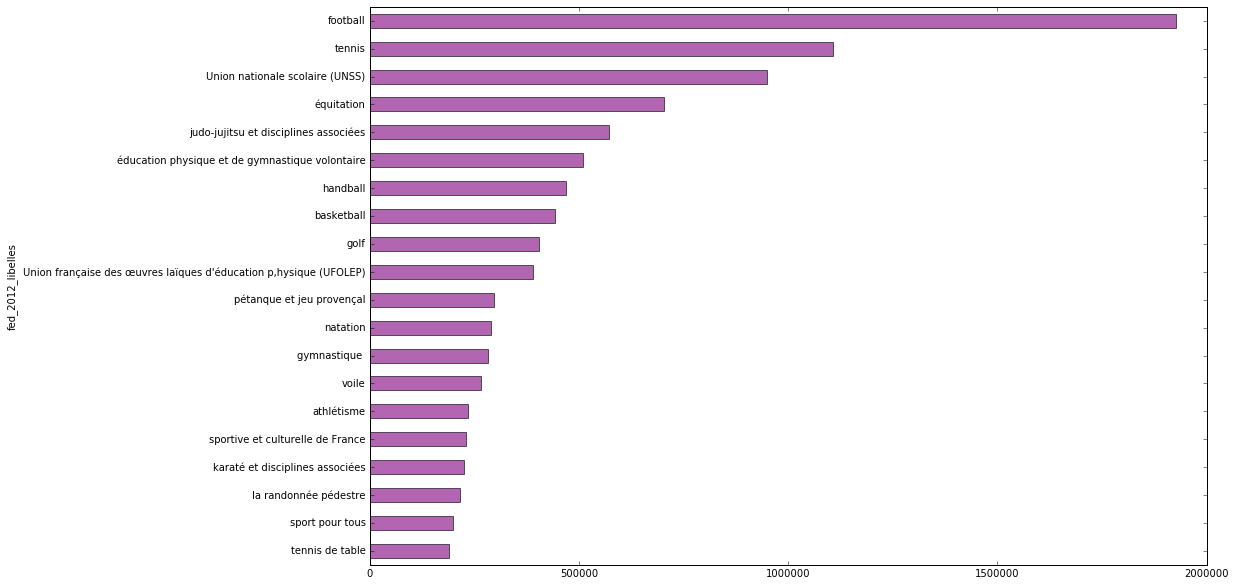

In [17]:
t_licences.groupby("fed_2012_libelles")["l_2012"].sum().sort_values(ascending=False).head(20).plot(figsize=(15, 10),
                                                                                                   kind='barh',
                                                                                                   color="purple",
                                                                                                    alpha=0.6)
plt.gca().invert_yaxis()

J'ai pu voir grâce à ce graphique que le sport le plus pratiqué en france (avec license) est le football. Mais j'ai aussi pu étudier les 20 suivants grâce à une commande : je peux faire varier le nombre de résultats que je veux.

### Dans quelle(s) commune(s) préfère-t-on le taekwondo ?

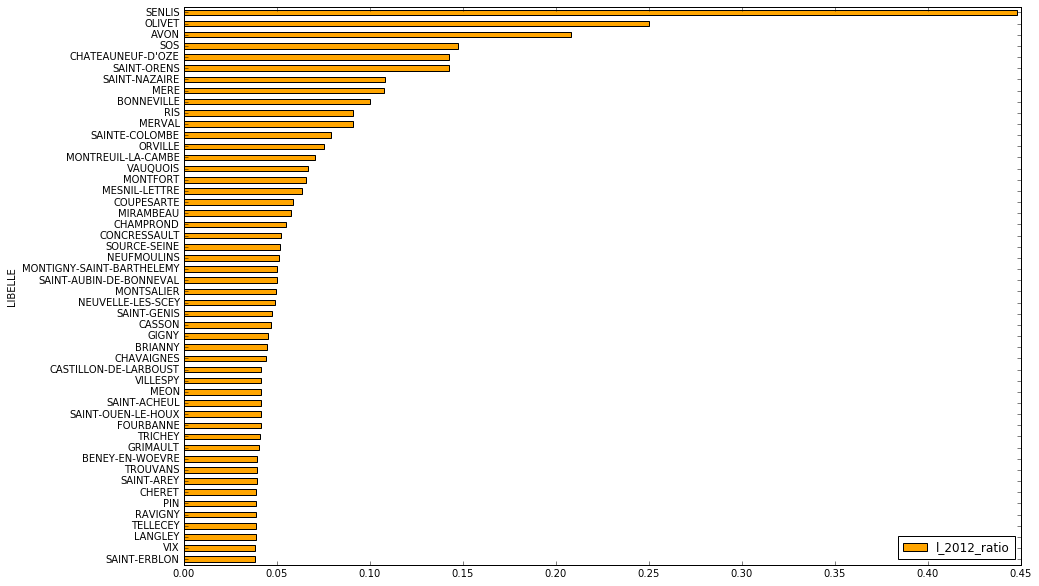

In [18]:
communes_taekwondo = t_licences.loc[t_licences["fed_2012"] == 103][['LIBELLE', 'l_2012_ratio']].sort_values(by="l_2012_ratio", ascending=False)


communes_taekwondo.head(50).plot(x="LIBELLE", y="l_2012_ratio", kind='barh', color='orange', figsize=(15, 10))
plt.gca().invert_yaxis()


In [19]:
t_licences.loc[(t_licences["fed_2012"] == 103) & (t_licences["LIBELLE"] == "SENLIS")][["LIBELLE",
                                                                                       "fed_2012",
                                                                                       "l_2012",
                                                                                       "pop_2010"]]

,LIBELLE,fed_2012,l_2012,pop_2010
543430,SENLIS,103,78,174.0


In [20]:
t_licences.loc[(t_licences["fed_2012"] == 103) & (t_licences["LIBELLE"] == "PARIS")][["LIBELLE",
                                                                                       "fed_2012",
                                                                                       "l_2012",
                                                                                       "pop_2010"]]

,LIBELLE,fed_2012,l_2012,pop_2010
662595,PARIS,103,3214,2243718.0


J'ai aussi pu déduire de ce graphique les communes les plus pratiquantes de taekwondo proportionellement au nombre d'habitants. J'ai ensuite fait des recherches sur Senlis (avec la proportionnalité par rapport au nombre d'habitants) puis sur Paris (non proportionnel) en ordonnant au programme de nommer la commune, le numéro de licence de taekwondo, le nombre de personnes licenciés et la population total.

### Dans quelles(s) commune(s) préfère-t-on le tennis au football ?

In [21]:
t_licences[(t_licences.LIBELLE == "ABBARETZ") & (comprf)]

NameError: name 'comprf' is not defined

In [22]:
t_licences.head()

,LIBELLE,fed_2012,l_2012,l_0_4_2012,l_5_9_2012,l_10_14_2012,l_15_19_2012,l_20_29_2012,l_30_44_2012,l_45_59_2012,...,l_h_2012_ratio,l_0_4_h_2012_ratio,l_5_9_h_2012_ratio,l_10_14_h_2012_ratio,l_15_19_h_2012_ratio,l_20_29_h_2012_ratio,l_30_44_h_2012_ratio,l_45_59_h_2012_ratio,l_60_74_h_2012_ratio,l_75_99_h_2012_ratio
0,ABERGEMENT-CLEMENCIAT,101,9,0,0,9,0,0,0,0,...,0.012438,0.0,0.000000,0.178571,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,ABERGEMENT-CLEMENCIAT,103,4,0,2,0,0,0,1,1,...,0.009950,0.0,0.055556,0.000000,0.0,0.000000,0.011364,0.013158,0.0,0.0
2,ABERGEMENT-CLEMENCIAT,105,1,0,0,1,0,0,0,0,...,0.002488,0.0,0.000000,0.035714,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,ABERGEMENT-CLEMENCIAT,108,1,0,0,0,0,1,0,0,...,0.002488,0.0,0.000000,0.000000,0.0,0.027778,0.000000,0.000000,0.0,0.0
4,ABERGEMENT-CLEMENCIAT,109,13,0,3,4,2,0,1,3,...,0.007463,0.0,0.027778,0.000000,0.0,0.000000,0.000000,0.026316,0.0,0.0


In [139]:
comprf = t_licences["fed_2012"].isin([111, 123])

t = t_licences.loc[comprf][["LIBELLE",
                        "l_2012",
                        "fed_2012_libelles"]]

t2 = t.groupby('LIBELLE')['l_2012'].max().reset_index(name='le_max')


In [140]:
t2.head(5)

,LIBELLE,le_max
0,AAST,3
1,ABAINVILLE,8
2,ABANCOURT,19
3,ABAUCOURT,8
4,ABAUCOURT-HAUTECOURT,3


In [25]:
resultat = pd.merge(t2, 
                     t.ix[:, ['LIBELLE', 'fed_2012_libelles', 'l_2012']],
                     left_on=['LIBELLE', 'le_max'],
                     right_on=['LIBELLE', 'l_2012'])
resultat.ix[:, ['LIBELLE', 'le_max', 'fed_2012_libelles']]

,LIBELLE,le_max,fed_2012_libelles
0,AAST,3,tennis
1,ABAINVILLE,8,football
2,ABANCOURT,19,football
3,ABAUCOURT,8,football
4,ABAUCOURT-HAUTECOURT,3,football
5,ABBANS-DESSOUS,14,football
6,ABBANS-DESSUS,12,football
7,ABBARETZ,94,football
8,ABBECOURT,21,football
9,ABBENANS,11,football


In [26]:
import numpy as np
grouped["l_2012", "fed_2012_libelles"].agg({"l_2012": np.max})

NameError: name 'grouped' is not defined

In [27]:
t = [x.startswith('r') for x in t_licences.fed_2012_libelles.tolist()]

In [28]:
t_licences.loc[t].fed_2012_libelles.value_counts()

roller sports    7162
rugby à XIII     1165
Name: fed_2012_libelles, dtype: int64

### Quelles sont les communes ou la boxe est elle le plus pratiqué?

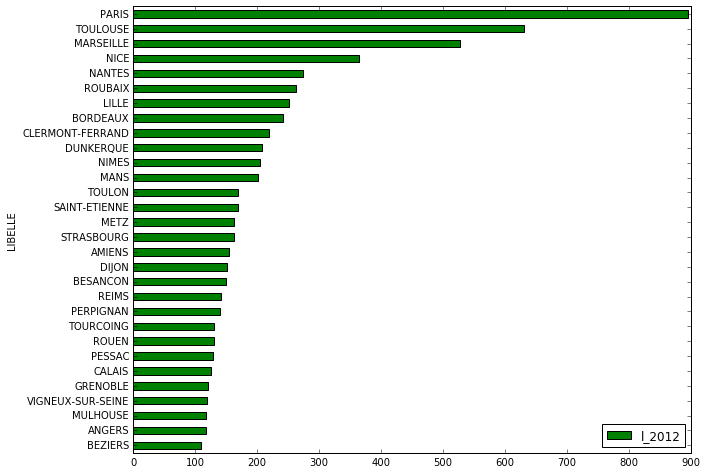

In [144]:
communes_boxe = t_licences.loc[t_licences["fed_2012"] == 106][['LIBELLE', 'l_2012']].sort_values(by="l_2012", ascending=False)


communes_boxe.head(30).plot(x="LIBELLE", y="l_2012", kind='barh', color='green', figsize=(10, 8))
plt.gca().invert_yaxis()

J'ai refait la même chose pour la boxe non proportionellement...

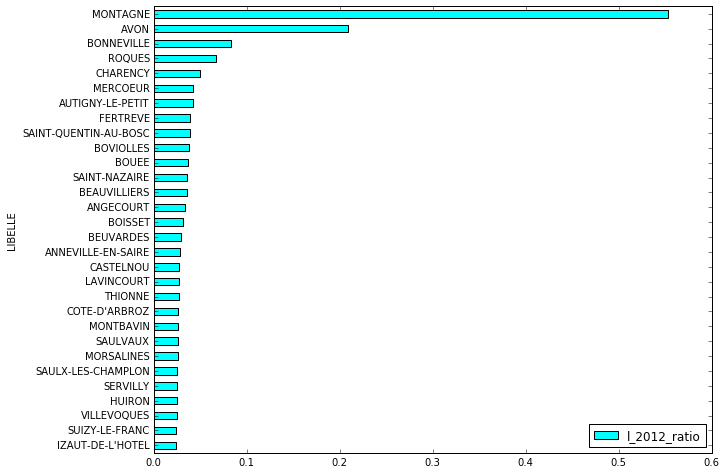

In [143]:
communes_boxe= t_licences.loc[t_licences["fed_2012"] == 106][['LIBELLE', 'l_2012_ratio']].sort_values(by="l_2012_ratio", ascending=False)


communes_boxe.head(30).plot(x="LIBELLE", y="l_2012_ratio", kind='barh', color='cyan', figsize=(10, 8))
plt.gca().invert_yaxis()

... puis proportionellement au nombre d'habitant dans la commune.

### Y-a-t-il une commune où il y a plus de boxeuses que de boxeurs ? Quelle est la commune où il y a le plus de boxeuses ?

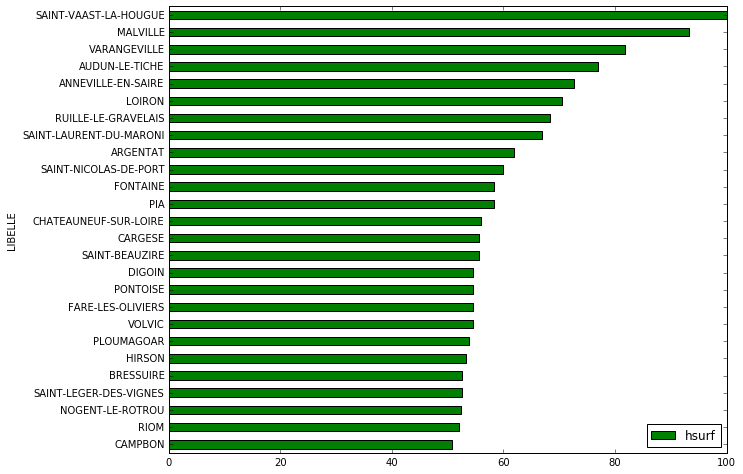

In [145]:
hsurf = t_licences["l_f_2012"]/(t_licences["l_f_2012"] + t_licences["l_h_2012"])*100

t_licences["hsurf"] = hsurf

selection_boxe_population = (t_licences["fed_2012"] == 106) & (t_licences["l_f_2012"] > t_licences["l_h_2012"] ) & (t_licences["l_2012"] > 10)
t_licences.loc[selection_boxe_population][['LIBELLE', "l_f_2012", "l_h_2012", "hsurf","pop_2010"]].sort_values(by="hsurf",
                                                                                       ascending=False).head(1000).plot(x="LIBELLE", y="hsurf", kind='barh', color='green', figsize=(10, 8))
plt.gca().invert_yaxis()

Comme indiqué dans le titre, j ai fait ici un graphique montrant les commune possedant plus de boxeuses que de boxeurs.

### Quels sont les sports préférés des personnes de plus de 40 ans ?

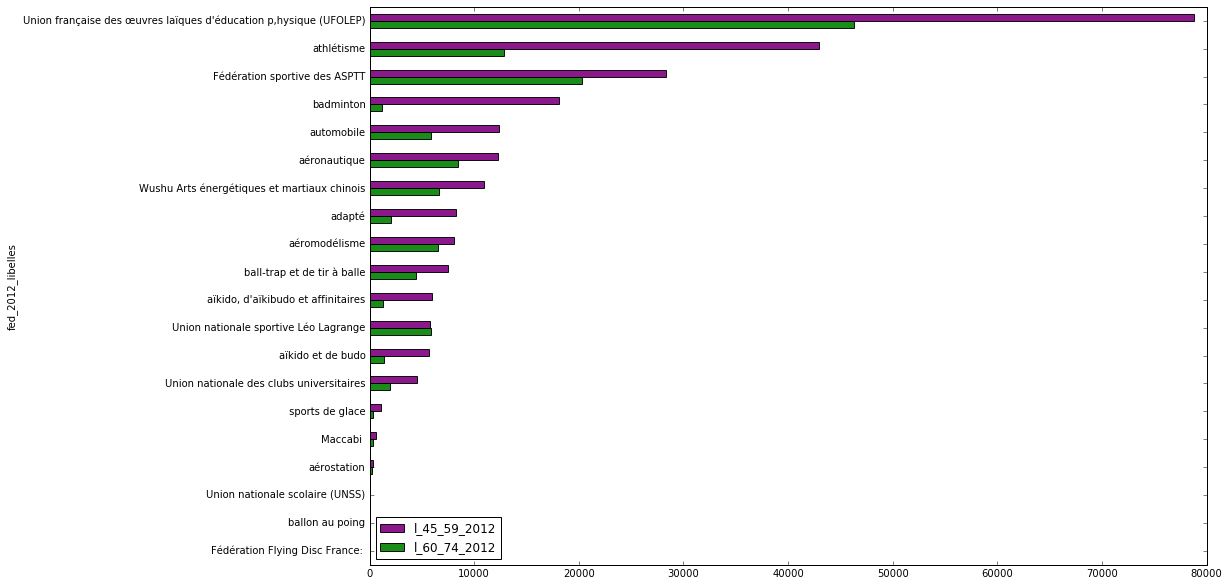

In [146]:
t_licences.groupby("fed_2012_libelles")[["l_45_59_2012","l_60_74_2012"]].sum().head(20).sort_values(by=["l_45_59_2012",
                                                                                                        "l_60_74_2012" ], ascending=False).plot(figsize=(15, 10),
                                                                                                                                                kind='barh',
                                                                                                                                                color=["purple","green"],
                                                                                                                                               alpha=0.9)
plt.gca().invert_yaxis()

### le nombre de personnes agées pratiquant le ballon au poing

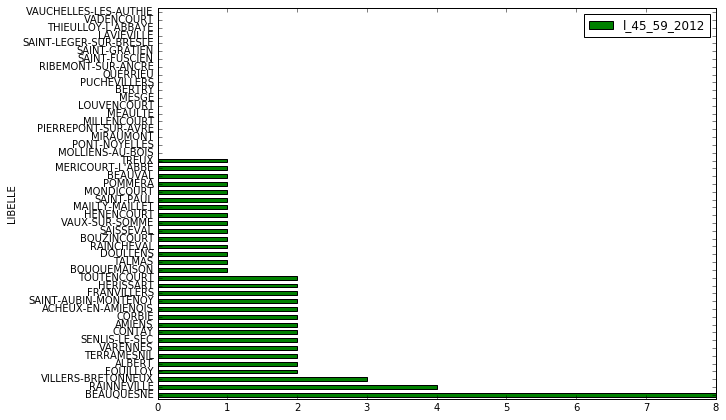

In [35]:
lol=t_licences["fed_2012"] == 208
t_licences.loc[lol][['LIBELLE', "fed_2012", "pop_2010","l_2012", "l_45_59_2012"]].sort_values(by="l_45_59_2012",ascending=False).head(50).plot(x="LIBELLE", 
                                                                                                             y="l_45_59_2012", 
                                                                                                             kind='barh', 
                                                                                                             color='green', 
                                                                                                             figsize=(10, 7))          




In [36]:
t_licences.columns

Index(['LIBELLE', 'fed_2012', 'l_2012', 'l_0_4_2012', 'l_5_9_2012',
       'l_10_14_2012', 'l_15_19_2012', 'l_20_29_2012', 'l_30_44_2012',
       'l_45_59_2012', 'l_60_74_2012', 'l_75_99_2012', 'l_f_2012',
       'l_0_4_f_2012', 'l_5_9_f_2012', 'l_10_14_f_2012', 'l_15_19_f_2012',
       'l_20_29_f_2012', 'l_30_44_f_2012', 'l_45_59_f_2012', 'l_60_74_f_2012',
       'l_75_99_f_2012', 'l_h_2012', 'l_0_4_h_2012', 'l_5_9_h_2012',
       'l_10_14_h_2012', 'l_15_19_h_2012', 'l_20_29_h_2012', 'l_30_44_h_2012',
       'l_45_59_h_2012', 'l_60_74_h_2012', 'l_75_99_h_2012', 'l_zus_2012',
       'l_zus_f_2012', 'l_zus_h_2012', 'pop_2010', 'pop_0_4_2010',
       'pop_5_9_2010', 'pop_10_14_2010', 'pop_15_19_2010', 'pop_20_29_2010',
       'pop_30_44_2010', 'pop_45_59_2010', 'pop_60_74_2010', 'pop_75_99_2010',
       'popf_2010', 'popf_0_4_2010', 'popf_5_9_2010', 'popf_10_14_2010',
       'popf_15_19_2010', 'popf_20_29_2010', 'popf_30_44_2010',
       'popf_45_59_2010', 'popf_60_74_2010', 'popf_75_99_

### Quels sont les sports préférés des très jeunes (0-4 ans)  ? des jeunes ( < 18 ans) ?

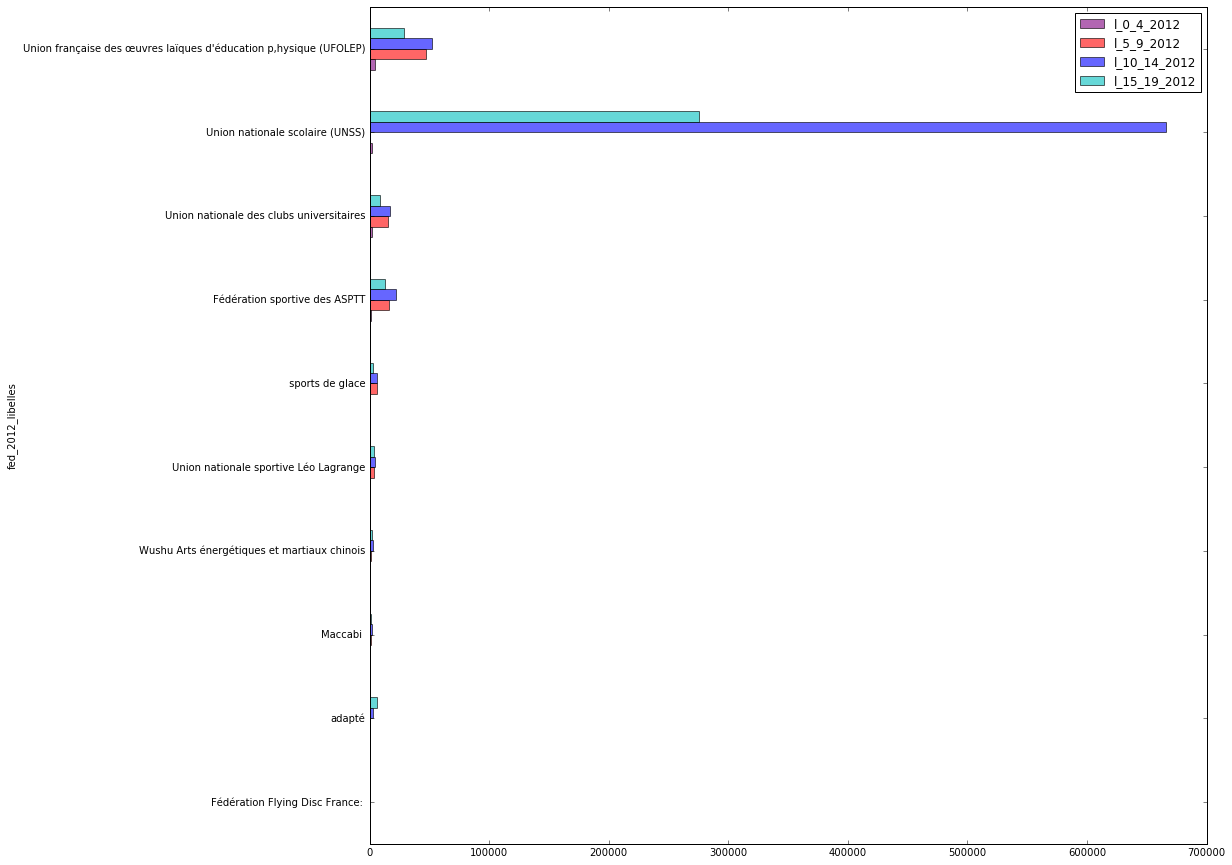

In [160]:
t_licences.groupby("fed_2012_libelles")[["l_0_4_2012",
                                         "l_5_9_2012", 
                                         "l_10_14_2012", 
                                         "l_15_19_2012"]].sum().head(10).sort_values(by=["l_0_4_2012",
                                                                                        "l_5_9_2012", 
                                                                                        "l_10_14_2012", 
                                                                                        "l_15_19_2012"], ascending=True).plot(figsize=(15, 15),
                                                                                                                                   kind='barh',
                                                                                                                                   color=["purple","red", "blue", "c"],
                                                                                                                                   alpha=0.6)


Ici la petite étude que j'ai fait montre les sports pratiqués pour chaque tranche d'age de 0 à 19 ans.

In [153]:
t_licences[(t_licences["fed_2012"] == 111)]["l_0_4_2012"].sum()

0

Le nombre d'enfants de 0 à 4 ans pratiquant le football.

### Quelle est la proportion homme/femme des pratiquants de l'équitation ?

In [39]:
select_E = (t_licences["fed_2012"] == 109) 
t_equitation = t_licences.loc[select_E][[ "l_f_2012", "l_h_2012"]]
proportionf = t_equitation["l_f_2012"].sum()/(t_equitation["l_f_2012"].sum()+t_equitation["l_h_2012"].sum())*100
proportionf

82.532431028470981

J'ai ici cherché la proportion de femmes faisant de l'équitation. A partir d'ici, on peut conclure que la proportion d'hommes pratiquant l'équitation est d'environ 17,5 pour cent.

### Quel est le sport le plus féminisé ? Masculanisé ?

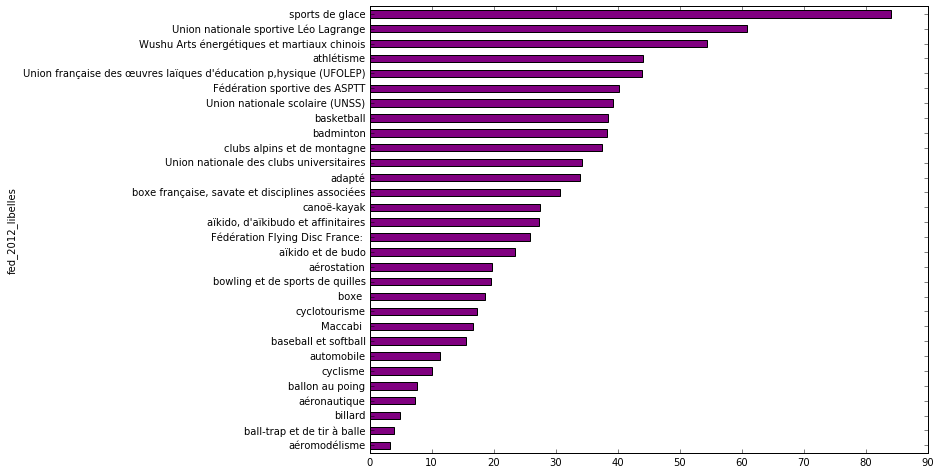

In [161]:
t_prop = t_licences.groupby("fed_2012_libelles")["l_f_2012"].sum()/t_licences.groupby("fed_2012_libelles")["l_2012"].sum()


result = t_prop.head(30).sort_values(ascending = False)*100
result.plot(figsize=(10, 8),
                                                        kind='barh',
                                                        color="purple",
                                                        y="t_prop")
plt.gca().invert_yaxis()

J'ai cherché ici la proportion de licences féminines dans les sports pratiqués essentiellement par des femmes. Ce sont les sports de glace.

In [156]:
t_sports = t_licences.groupby("fed_2012_libelles")[["l_f_2012", "l_2012", "t_prop"]].sum()
t_sports["t_prop"] = t_prop
t_sports.head(20).sort_values(by="t_prop", ascending=False)

,l_f_2012,l_2012,t_prop
fed_2012_libelles,,,
sports de glace,17292,20551,0.841419
Union nationale sportive Léo Lagrange,20332,33377,0.609162
Wushu Arts énergétiques et martiaux chinois,19061,35048,0.543854
athlétisme,103791,235661,0.440425
"Union française des œuvres laïques d'éducation p,hysique (UFOLEP)",171160,389695,0.439215
Fédération sportive des ASPTT,59731,148731,0.401604
Union nationale scolaire (UNSS),372834,948797,0.392954
badminton,62654,163572,0.383036
Union nationale des clubs universitaires,24090,70268,0.342830


C'est ici la même chose que le graphique ci dessus mais en tableau.